In [1]:
import numpy as np


#加载数据
def load_data():
    with open('简单分类数据.txt') as fr:
        lines = fr.readlines()

    x = np.empty((len(lines), 2), dtype=float)
    y = np.empty(len(lines), dtype=int)

    for i in range(len(lines)):
        line = lines[i].strip().split('\t')
        x[i] = line[:2]
        y[i] = line[2]

    #以y区分两类x
    x0 = x[y == -1]
    x1 = x[y == 1]
    
    return x0, x1


x0, x1 = load_data()
x0[:5], x1[:5]

(array([[-0.017612, 14.053064],
        [-0.752157,  6.53862 ],
        [-1.322371,  7.152853],
        [ 0.423363, 11.054677],
        [ 0.667394, 12.741452]]),
 array([[-1.395634,  4.662541],
        [ 0.406704,  7.067335],
        [-2.46015 ,  6.866805],
        [ 0.850433,  6.920334],
        [ 1.176813,  3.16702 ]]))

In [3]:
#求向量均值
mu0 = x0.mean(axis=0)
mu1 = x1.mean(axis=0)
mu0, mu1

(array([ 0.08204613, 10.65488423]), array([-0.01613109,  2.95908379]))

In [4]:
#求方差,这里的方差是求所有维度的方差的和
sigma0 = np.power(x0 - mu0, 2).sum()
sigma1 = np.power(x1 - mu1, 2).sum()
sigma0, sigma1

(214.65774583851362, 581.3715229024133)

In [5]:
#初始化w
w = np.ones(2)
w

array([1., 1.])

In [75]:
#这个就是loss函数
def get_J():
    #投影后,两类的中心点距离最远
    fenzi = np.power(w.dot(mu0) - w.dot(mu1), 2)
    #投影后,两类的方差最小
    fenmu = w.dot(sigma0).dot(w) + w.dot(sigma1).dot(w)

    return fenzi / fenmu


get_J()

0.03815568736348389

In [76]:
#暴力求梯度法
def gradient():
    global w
    upsilon = 1e-2

    l1 = get_J()
    w[0] += upsilon
    l2 = get_J()
    w[0] -= upsilon
    gradient_w0 = (l2 - l1) / upsilon

    l1 = get_J()
    w[1] += upsilon
    l2 = get_J()
    w[1] -= upsilon
    gradient_w1 = (l2 - l1) / upsilon

    return np.array([gradient_w0, gradient_w1])


gradient()

array([-0.03701316,  0.03700377])

In [77]:
#训练
for i in range(50):
    w += gradient() * 1

    if i % 10 == 0:
        print(get_J(), w)

0.04090235565163434 [0.96298684 1.03700377]
0.06288673175651525 [0.57619295 1.29978382]
0.07156404745593156 [0.29631578 1.39229452]
0.07379523338561801 [0.14778777 1.4158689 ]
0.0742890687265664 [0.07624361 1.42136748]


In [78]:
#投影
p0 = x0.dot(w)
p1 = x1.dot(w)

p0[:5], p1[:5]

(array([19.99090941,  9.26794796, 10.11611954, 15.74526361, 18.15581507]),
 array([ 6.57014221, 10.07217546,  9.6580544 ,  9.88299705,  4.55825177]))

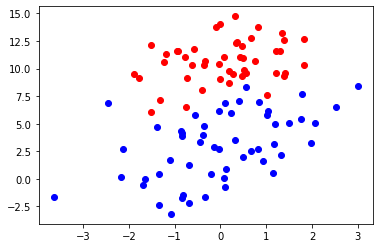

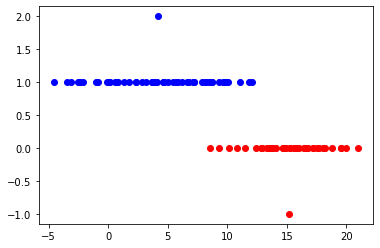

In [79]:
import matplotlib.pyplot as plt


def draw():
    plt.scatter(x0[:, 0], x0[:, 1], c='red')
    plt.scatter(x1[:, 0], x1[:, 1], c='blue')

    plt.show()

    plt.scatter(p0, np.zeros(len(p0)), c='red')
    plt.scatter(p1, np.ones(len(p1)), c='blue')

    plt.scatter(p0.mean(), -1, c='red')
    plt.scatter(p1.mean(), 2, c='blue')

    plt.show()


draw()

In [80]:
#预测函数
def predict(p):
    d0 = np.power(p - p0.mean(), 2)
    d1 = np.power(p - p1.mean(), 2)
    pred = 1 if d0 > d1 else -1
    return pred


predict(p0[0])

-1

In [81]:
#测试
correct = 0
for i in p0:
    if predict(i) == -1:
        correct += 1

for i in p1:
    if predict(i) == 1:
        correct += 1

correct / (len(p0) + len(p1))

0.92